# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Create two new dataframes
northdf = pd.read_csv('NorthCallCenter.csv')
southdf = pd.read_csv('SouthCallCenter.csv')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [2]:
#Code Used:
#.info() returns: 

northdf.info()
northdf['Rep ID'].value_counts()
#name of the column, Non-null Count meaning how many non-null values their are in that column and Dtype
#int64 means int value, float64 means float value, object means string value.

#there are 9 reps int he North branch

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

#### EDA Question 1B:  How many reps are in the South branch?  

In [3]:
#Code Used:
southdf.info()
southdf['Rep ID'].value_counts()

##there are 11 reps in the South branch

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [4]:
#Code Used:
northdf[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

# Busy Minutes          9.987755
# Not Ready Minutes     1.914286
# Incoming Wait Time    3.048780
#During Call Wait Time    2.967347


Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [5]:
#Code Used:
southdf[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

# Busy Minutes             10.054140
# Not Ready Minutes         1.910828
# Incoming Wait Time        3.000000
# During Call Wait Time     3.076433

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [6]:
# Code Used:
total_timeblock= northdf['Time Block'].value_counts()+ southdf['Time Block'].value_counts()
# northdf['Time Block'].value_counts()
# southdf['Time Block'].value_counts()
print(total_timeblock)
# northdf["total_timeblock"]= (northdf["Time Block"] +southdf["Time Block"])
# print(northdf["total_timeblock"])

10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Time Block, dtype: int64


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes =  9.987755
> - Not Ready Minutes = 1.914286
> - Incoming Wait Time = 3.048780
> - During Call Wait Time = 2.967347
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes =  10.054140
> - Not Ready Minutes = 1.910828
> - Incoming Wait Time = 3.000000
> - During Call Wait Time = 3.076433
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: 

There is missing data for the Incoming Wait time as displayed under the .info() function that was run before. 

North branch: Incoming Wait Time     82/245 was NON NULL (163 was missing a value) 66.5% is null

South branch: Incoming Wait Time     126/314 was NON NULL. (188 was missing a value) 59.9% is null

These may be missing a value because because the call was lost or abandoned and never picked up on time.
OR it could be that there was NO wait time as many call centers have an atuo-answer for employees to utilize that would make the answer time 0 seconds. 
Looking at the data in the coude block below, only a very small amount of calls would have been attributed to lost/abandoned, which makes me think that most of these calls were zero second pick ups- and some of them do have an incoming call value (though most are NaN)

Since the null values are very high in regard to the data, I think the best option would be to replace the missing data with "N/A" as we don't want to skew data results by trying to calculate missing/mode/mean for so many missing values. dropping the column/rows is not an option as these nulls are over half the data.


In [7]:
# southdf[["Incoming Wait Time"]].value_counts()
# northdf[["Incoming Wait Time"]].value_counts()
# northdf[['Abandoned']].value_counts() # 7 abandoned ( change these values to boolean later)
# northdf[["Lost Call"]].value_counts() # 5 lost (change these values to boolean )

# southdf[['Abandoned']].value_counts() # 4 abandoned ( change these values to boolean later)
# southdf[["Lost Call"]].value_counts() # 11 lost (change these values to boolean )

In [8]:
# Code Used
# Add Additional Cells as needed.

#Checking if the abandoned/lost calls were null: 
# northdf[northdf['Abandoned'] == 1]
# northdf[northdf['Lost Call'] == 1]
# southdf[southdf['Lost Call'] == 1]
# southdf[southdf['Abandoned'] == 1]
#most are null, but not all

#3 replacing nulls with 0 value.
northdf["Incoming Wait Time"].fillna("N/A", inplace=True)
southdf["Incoming Wait Time"].fillna("N/A", inplace=True)

# northdf[northdf['Incoming Wait Time'] == "MISSING"] # all 163 nan was replaced
southdf[southdf['Incoming Wait Time'] == "N/A"] # all 188 nan was replaced


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
126,126,South,Product Support,9:00 AM,Outgoing,C,Sandy,NO,1,0,12,2,N/A,4,1
127,127,South,Product Support,9:00 AM,Outgoing,C,Susan,NO,1,0,9,3,N/A,4,1
128,128,South,Product Support,9:00 AM,Outgoing,D,Karl,NO,1,0,9,3,N/A,4,1
129,129,South,Sales Support,10:00 AM,Outgoing,C,Susan,NO,1,0,8,2,N/A,4,1
130,130,South,Sales Support,11:00 AM,Outgoing,D,Josh,NO,1,0,9,2,N/A,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,N/A,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,N/A,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,N/A,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,N/A,2,1


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: we need to strip whitespace from the values, so that all values are conforming. I used the strip() function on the column to bring conformity

In [9]:
#Code Used
# Add Additional Cells as needed.
# northdf['Sale'].value_counts() # this one does have two "YES" values for the sale.
# southdf['Sale'].value_counts() # this one is fine

# This is a matter of needing to trim spaces.

northdf['Sale']=northdf['Sale'].str.strip()
northdf['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: I used the .duplicated() function and 2I found no duplicate rows in these dataframes.

In [10]:
#Code Used

duplicatednorth=northdf.duplicated()
duplicatednorth.value_counts()  ## ALL FALSE, NO DUPLICATES

duplicatedsouth=southdf.duplicated()
duplicatedsouth.value_counts() ## ALL FALSE, NO DUPLICATES
# Add Additional Cells as needed.

False    314
dtype: int64

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I think we could remove the SALE and CALL quque-SALE numbers are so low and does not affect customer service abilities, CALL column is just stating that each row is one call, which is a given as each row is one call

In [11]:
#Code Used
    
#Unnamed- keep? I think that this woulc be a good Unique Identifier that we could potentially rename later to something like CALL ID   
# Branch - keep, as we may be merging these data sets and discerning branches is important
# Call Purpose - keep, as call purpose may hold valuable info on which calls take longer
# Time Block- keep, as call flow during the day can help identify peak call hours.
# Incoming or Outgoing - keep, as incoming/outgoing calls gives good info on how many return calls are needed versus incoming calls
# Queue - keep for calculating drops
# Rep ID - keep for identifying rep's stats
# Sale- REMOVE? unless we're tracking sale goals as a stat, the numbers are very low for sale 
# Lost Call - KEEP - important for tracking tech issues
# Abandoned - KEEP - important for tracking stats/customer service levels.
# Busy Minutes - KEEP  important to see when customer is waiting for a rep, but all reps are with other customers. May show a demand for more reps.
# Not Ready Minutes- KEEP- shows which reps are not in queue taking/waiting on calls.
# Incoming Wait Time - KEEP, shows how long a rep takes to answer a call and can show if reps are hitting goals
# During Call Wait Time- KEEP, shows how long reps put customers on hold and can affect customer satisfaction.
# Calls - KEEP- EACH ROW is one call


# Add Additional Cells as needed.


northdf=northdf.drop(columns=['Sale'])
southdf=southdf.drop(columns=['Sale'])

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [12]:
# Create dataframe for the entire company named df

df = northdf.merge(southdf, how='outer')

df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,0,0,10,3,N/A,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,0,0,12,3,N/A,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,0,0,9,3,N/A,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,0,0,10,1,N/A,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent; 37 Calls
- South Branch = Eric; 35 Calls


In [13]:
# Code Used
# Add Additional Cells as needed.

In [14]:
df.groupby(['Branch', 'Rep ID']).sum().sort_values(by='Calls', ascending=False)


C:\Users\cbate\AppData\Local\Temp\ipykernel_15160\2089283683.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Branch', 'Rep ID']).sum().sort_values(by='Calls', ascending=False)


Unnamed: 0  Lost Call  Abandoned  Busy Minutes  \
Branch Rep ID                                                   
North  Brent         4840          0          1           362   
South  Eric          5039          0          0           361   
       Randy         4576          3          1           320   
       Sandy         4694          1          0           325   
       Helga         5236          0          2           292   
North  Lilly         3375          0          2           307   
       Duke          2999          2          0           292   
       Todd          4252          1          0           296   
South  Kate          4615          0          0           291   
       George        4620          0          0           298   
       Karl          4532          1          0           287   
       Josh          3960          3          0           260   
       Susan         4006          2          0           267   
North  Joe           3178          0          0           256   
South  Sharon        4226          1          1           257   
North  Xander        3340          1          0           244   
       Cam           2746          1          0           233   
       Andy          2494          0          3           228   
       Amanda        2666          0          1           229   
South  Alice         3637          0          0           199   

               Not Ready Minutes  During Call Wait Time  Calls  
Branch Rep ID                                                   
North  Brent                  71                    117     37  
South  Eric                   54                    112     35  
       Randy                  66                     98     33  
       Sandy                  60                    100     32  
       Helga                  58                     95     31  
North  Lilly                  59                     88     30  
       Duke                   56                     85     29  
       Todd                   58                     97     29  
South  Kate                   61                     83     29  
       George                 53                     87     29  
       Karl                   61                     85     28  
       Josh                   50                     83     26  
       Susan                  53                     88     26  
North  Joe                    49                     81     26  
South  Sharon                 38                     77     25  
North  Xander                 44                     68     24  
       Cam                    46                     66     24  
       Andy                   43                     65     23  
       Amanda                 43                     60     23  
South  Alice                  46                     58     20

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch abandoned call rate is 
3.66% with a total of 3 out of 82 calls being abandoned.
- South Branch abandoned call rate is 
0.79% with a total of 1 out of 126 calls being abandoned.
- All Branches abandoned call rate is 
1.92% with a total of 4 out of 208 calls being abandoned.

- Do any of these fall out of the optimal range of 2-5%? These numbers are below the expected range, which is exceeding expectations.

In [24]:
# Code Used

## I know I just changed the NaN values for incoming earlier to N/A but I think that this portion of data needs the 
# missing data dropped, because the missing data will GREATLY skew these particular calculations.

# droppedna_incoming= (df[df["Incoming Wait Time"] != "N/A"])

# north_branch= droppedna_incoming.loc[df['Branch'] == "North"]
# south_branch= droppedna_incoming.loc[df['Branch'] == "South"]
# each_branch=  df.groupby(['Branch']) checking this way works too ***




north_branch= df.loc[df['Branch'] == "North"]
south_branch= df.loc[df['Branch'] == "South"]


# total_branch=droppedna_incoming


def calc_abandoned(group, branch):
    abanoned_calls=group['Abandoned'].sum()
    total_calls=group['Calls'].sum()
    abandoned_rate= (abanoned_calls/total_calls) *100
    rounded=abandoned_rate.round(2)
    print(f"{branch} abandoned call rate is \n{rounded}% with a total of {abanoned_calls} out of {total_calls} calls being abandoned.")
    
calc_abandoned(north_branch, "North Branch")
calc_abandoned(south_branch, "South Branch")
calc_abandoned(total_branch, "All Branches")

# calc_abandoned(each_branch, "All Branches") --this did provide the same numbers ***



North Branch abandoned call rate is 
2.86% with a total of 7 out of 245 calls being abandoned.
South Branch abandoned call rate is 
1.27% with a total of 4 out of 314 calls being abandoned.
All Branches abandoned call rate is 
1.92% with a total of 4 out of 208 calls being abandoned.


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:

- North Branch ideal incoming answering rates is: 
40.24% with a total of 33 out of 82 calls hitting ideal goals
- South Branch ideal incoming answering rates is: 
38.1% with a total of 48 out of 126 calls hitting ideal goals
- Company Wide ideal incoming answering rates is: 
38.94% with a total of 81 out of 208 calls hitting ideal goals

In [16]:
# Code Used

#3 I'm still using the DROPPED N/A VALUES FOR THIS CALCULATION AS WELL


# def calc_incoming(group):
#     ideal_call_1=group["Incoming Wait Time"].value_counts()[1]
#     ideal_call_2=group["Incoming Wait Time"].value_counts()[2]
#     print(ideal_call_1)
#     print(ideal_call_2)
#     total_ideal_call=ideal_call_1+ideal_call_2
#     print(total_ideal_call)
#     total_calls=group["Calls"].sum()
#     ideal_incoming_rate= (total_ideal_call/total_calls) *100
#     print(f"The ideal incoming call rate is \n{ideal_incoming_rate} ")

    

# calc_incoming(each_branch)
# calc_incoming(total_branch)

## ^^ that way does not work for each branch, it skews the results on the south branch due to the value counts not counting both columns seperately




def calc_incoming(group, branch):
    ideal_call_1=group["Incoming Wait Time"].value_counts()[1]
    ideal_call_2=group["Incoming Wait Time"].value_counts()[2]
    total_ideal_call=ideal_call_1+ideal_call_2
    total_calls=group["Calls"].sum()
    ideal_incoming_rate= (total_ideal_call/total_calls) *100
    rounded=ideal_incoming_rate.round(2)
    print(f"- {branch} ideal incoming answering rates is: \n{rounded}% with a total of {total_ideal_call} out of {total_calls} calls hitting ideal goals")


calc_incoming(north_branch, "North Branch")
calc_incoming(south_branch, "South Branch")
calc_incoming(total_branch, "Company Wide")

- North Branch ideal incoming answering rates is: 
0.4% with a total of 33 out of 82 calls hitting ideal goals
- South Branch ideal incoming answering rates is: 
0.38% with a total of 48 out of 126 calls hitting ideal goals
- Company Wide ideal incoming answering rates is: 
0.39% with a total of 81 out of 208 calls hitting ideal goals


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds= 3.05
- South Branch in seconds= 3.0
- Company Wide in seconds= 3.02


In [17]:
# # Code Used 

# # Mean= Average: 
# DataFrame[["Column1", "Column2"]].mean()



north_branch["Incoming Wait Time"].mean()


def incoming_mean(group, branch):
    avg_incoming=group["Incoming Wait Time"].mean()
    rounded=avg_incoming.round(2)
    print(f"- {branch} in seconds= {rounded}")
    
incoming_mean(north_branch, "North Branch")
incoming_mean(south_branch, "South Branch")
incoming_mean(total_branch, "Company Wide")

- North Branch in seconds= 3.05
- South Branch in seconds= 3.0
- Company Wide in seconds= 3.02


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a Bar Graph because it made sense to me. line graphs and scatter plots just didn't compare between the queues easily for a base abandonment rate.

{'A': 4.166666666666666, 'B': 2.013422818791946, 'C': 0.7246376811594203, 'D': 1.7045454545454544}



C:\Users\cbate\AppData\Local\Temp\ipykernel_15160\1572501570.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby('Queue').agg('sum')


{'A': 4.166666666666666, 'B': 2.013422818791946, 'C': 0.7246376811594203, 'D': 1.7045454545454544}


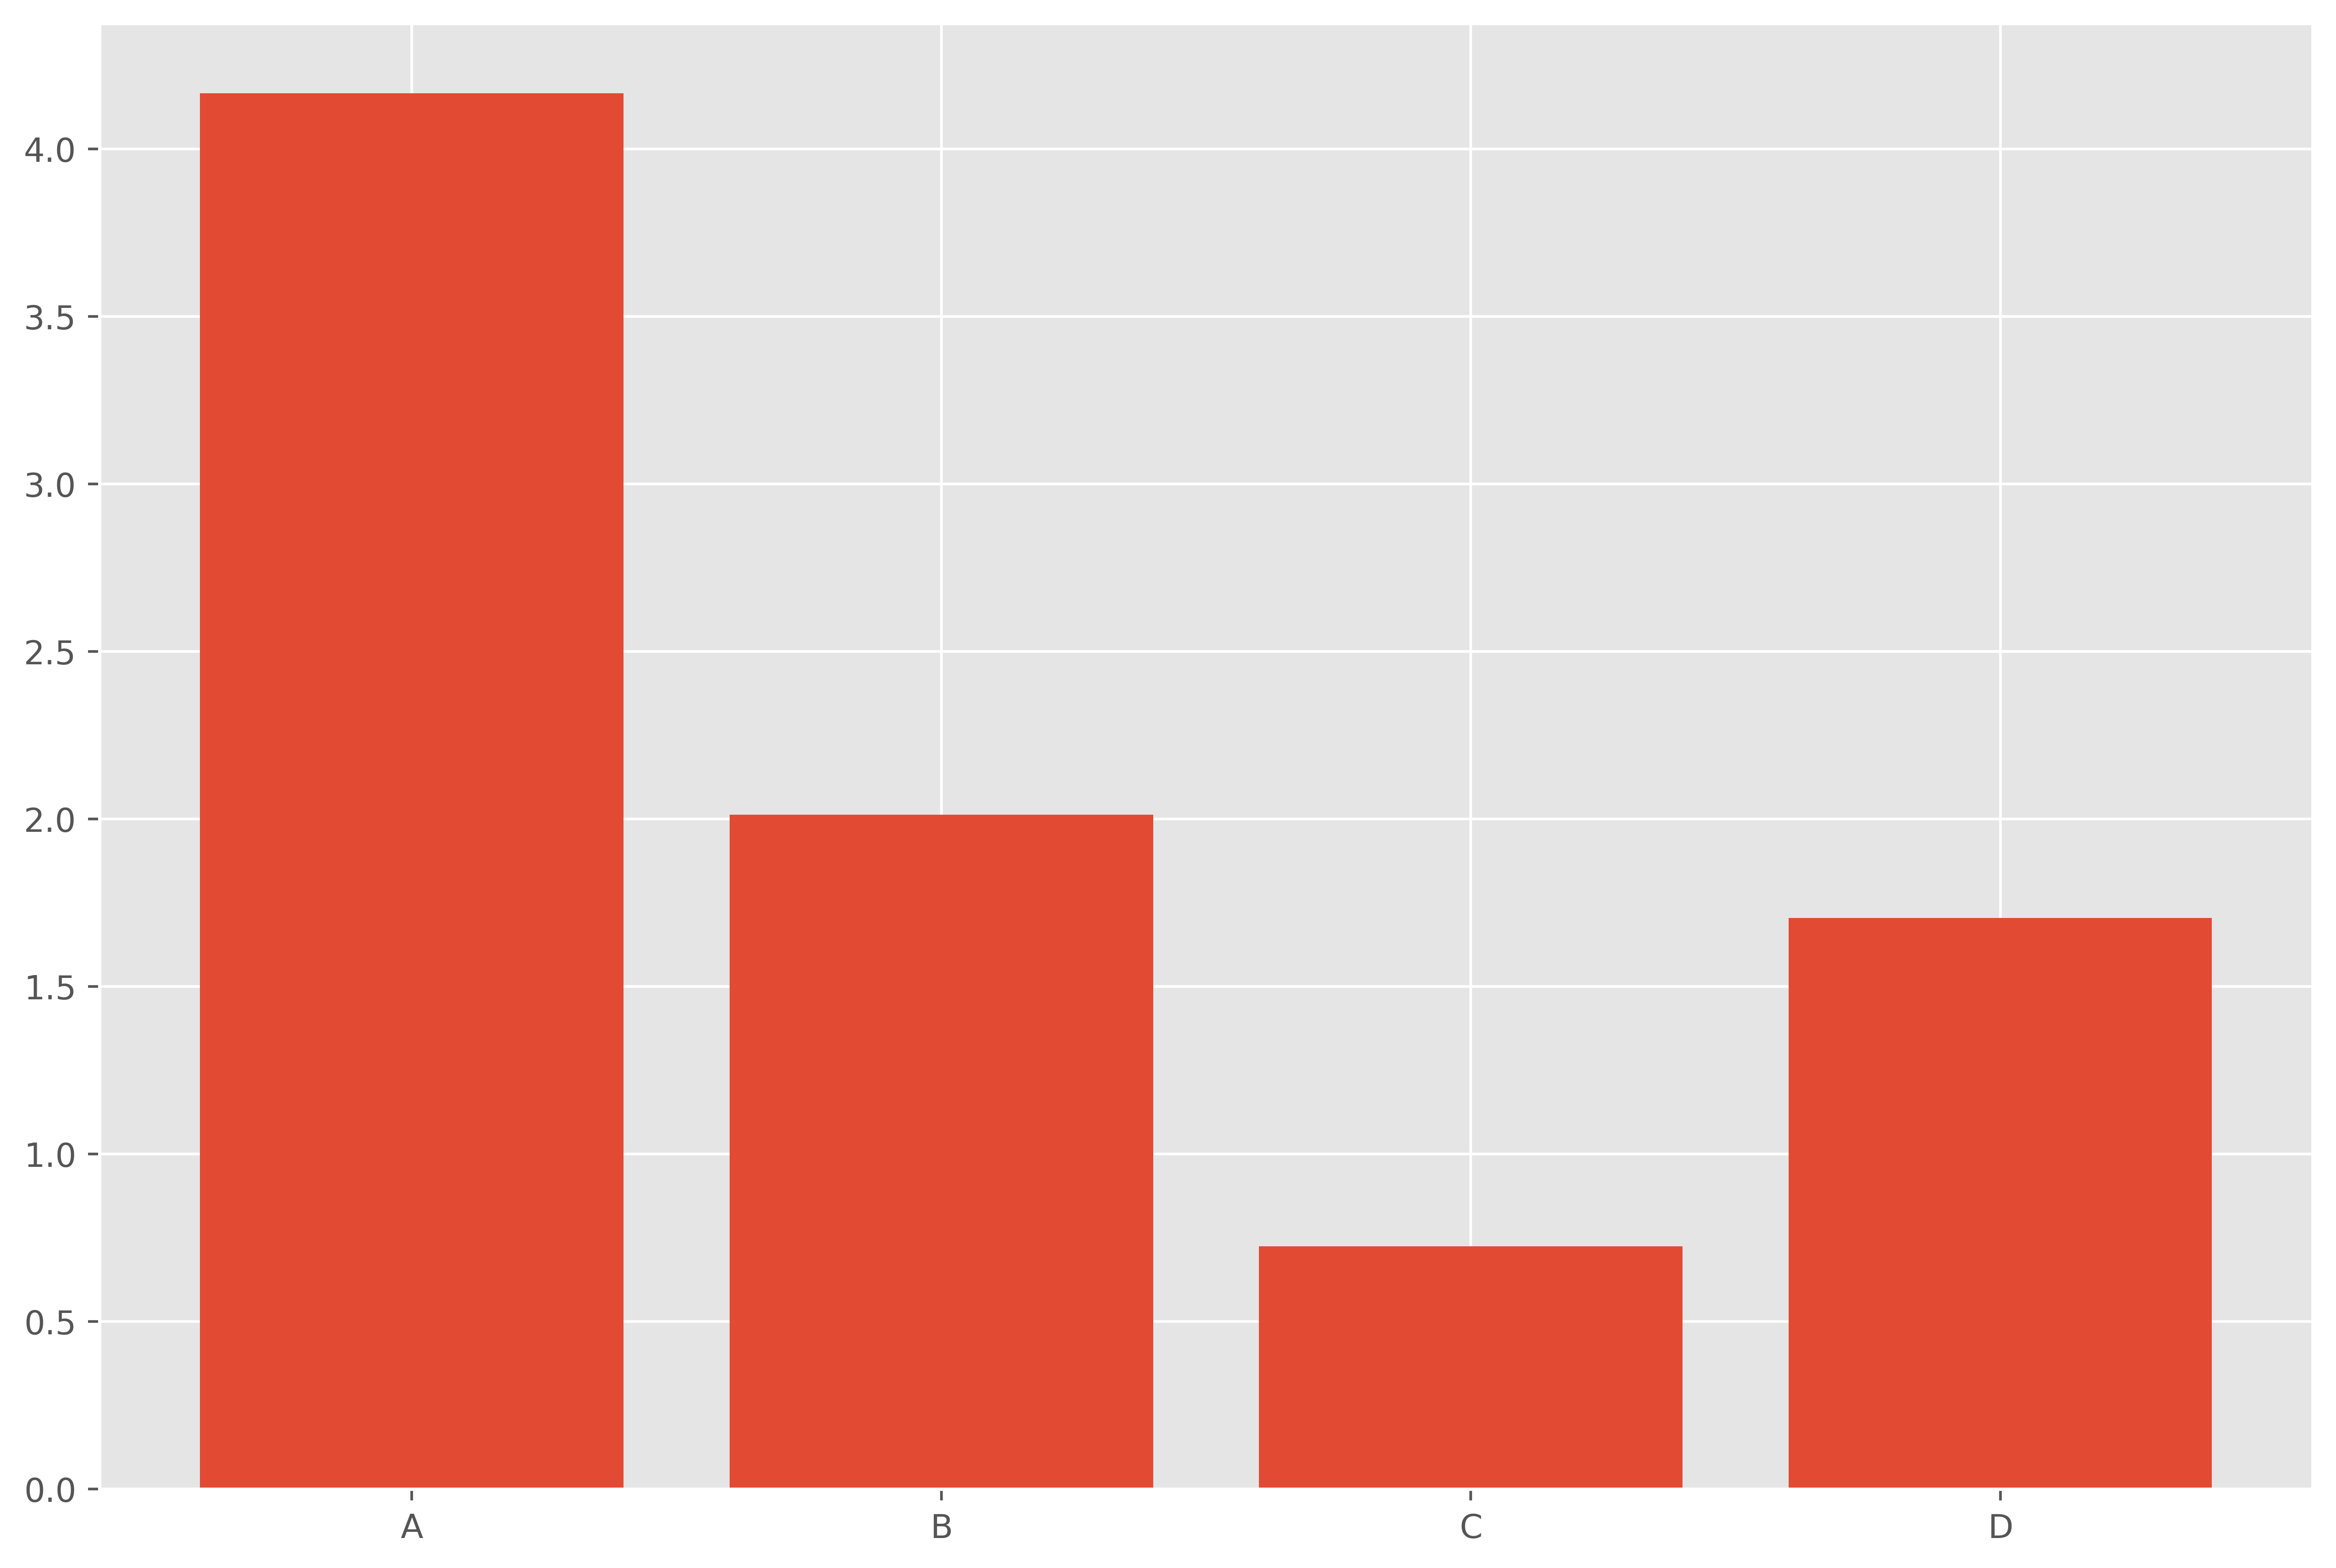

In [18]:
# Create visualization 1 here
# Import any additional libraries needed with alias

import numpy as np
from sklearn import datasets
 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
 
matplotlib.rcParams['font.size'] = 10

matplotlib.rcParams['figure.dpi'] = 500
 
from IPython.core.pylabtools import figsize
 
# df['Abandoned'].value_counts().plot(kind='bar')

# # The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby('Queue').agg('sum')
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] *100

print(abandonment_rates)

#Your Code Here:
# bargraph = df['Abandoned'].plot.bar(x = df['Queue'].value_counts())

# data = {'milk': 60, 'water': 10}
names = list(abandonment_rates.keys())
values = list(abandonment_rates.values())

plt.bar(range(len(abandonment_rates)), values, tick_label=names)
plt.show()


# queue_dict(abandonment_rates).plot.bar()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose bar grap again because I just think it best represents the data in an easily consumable way, I feel line, dot, and box plots are allbest for timelines or displaying outliers.


        IncomingCall TotalCall Service Level %
Rep ID                                   
Amanda        3        5        60.000000
Andy          3       10        30.000000
Brent         6        8        75.000000
Cam           5       11        45.454545
Duke          6       14        42.857143
Joe           2       10        20.000000
Lilly         4       12        33.333333
Todd          2        6        33.333333
Xander        2        6        33.333333

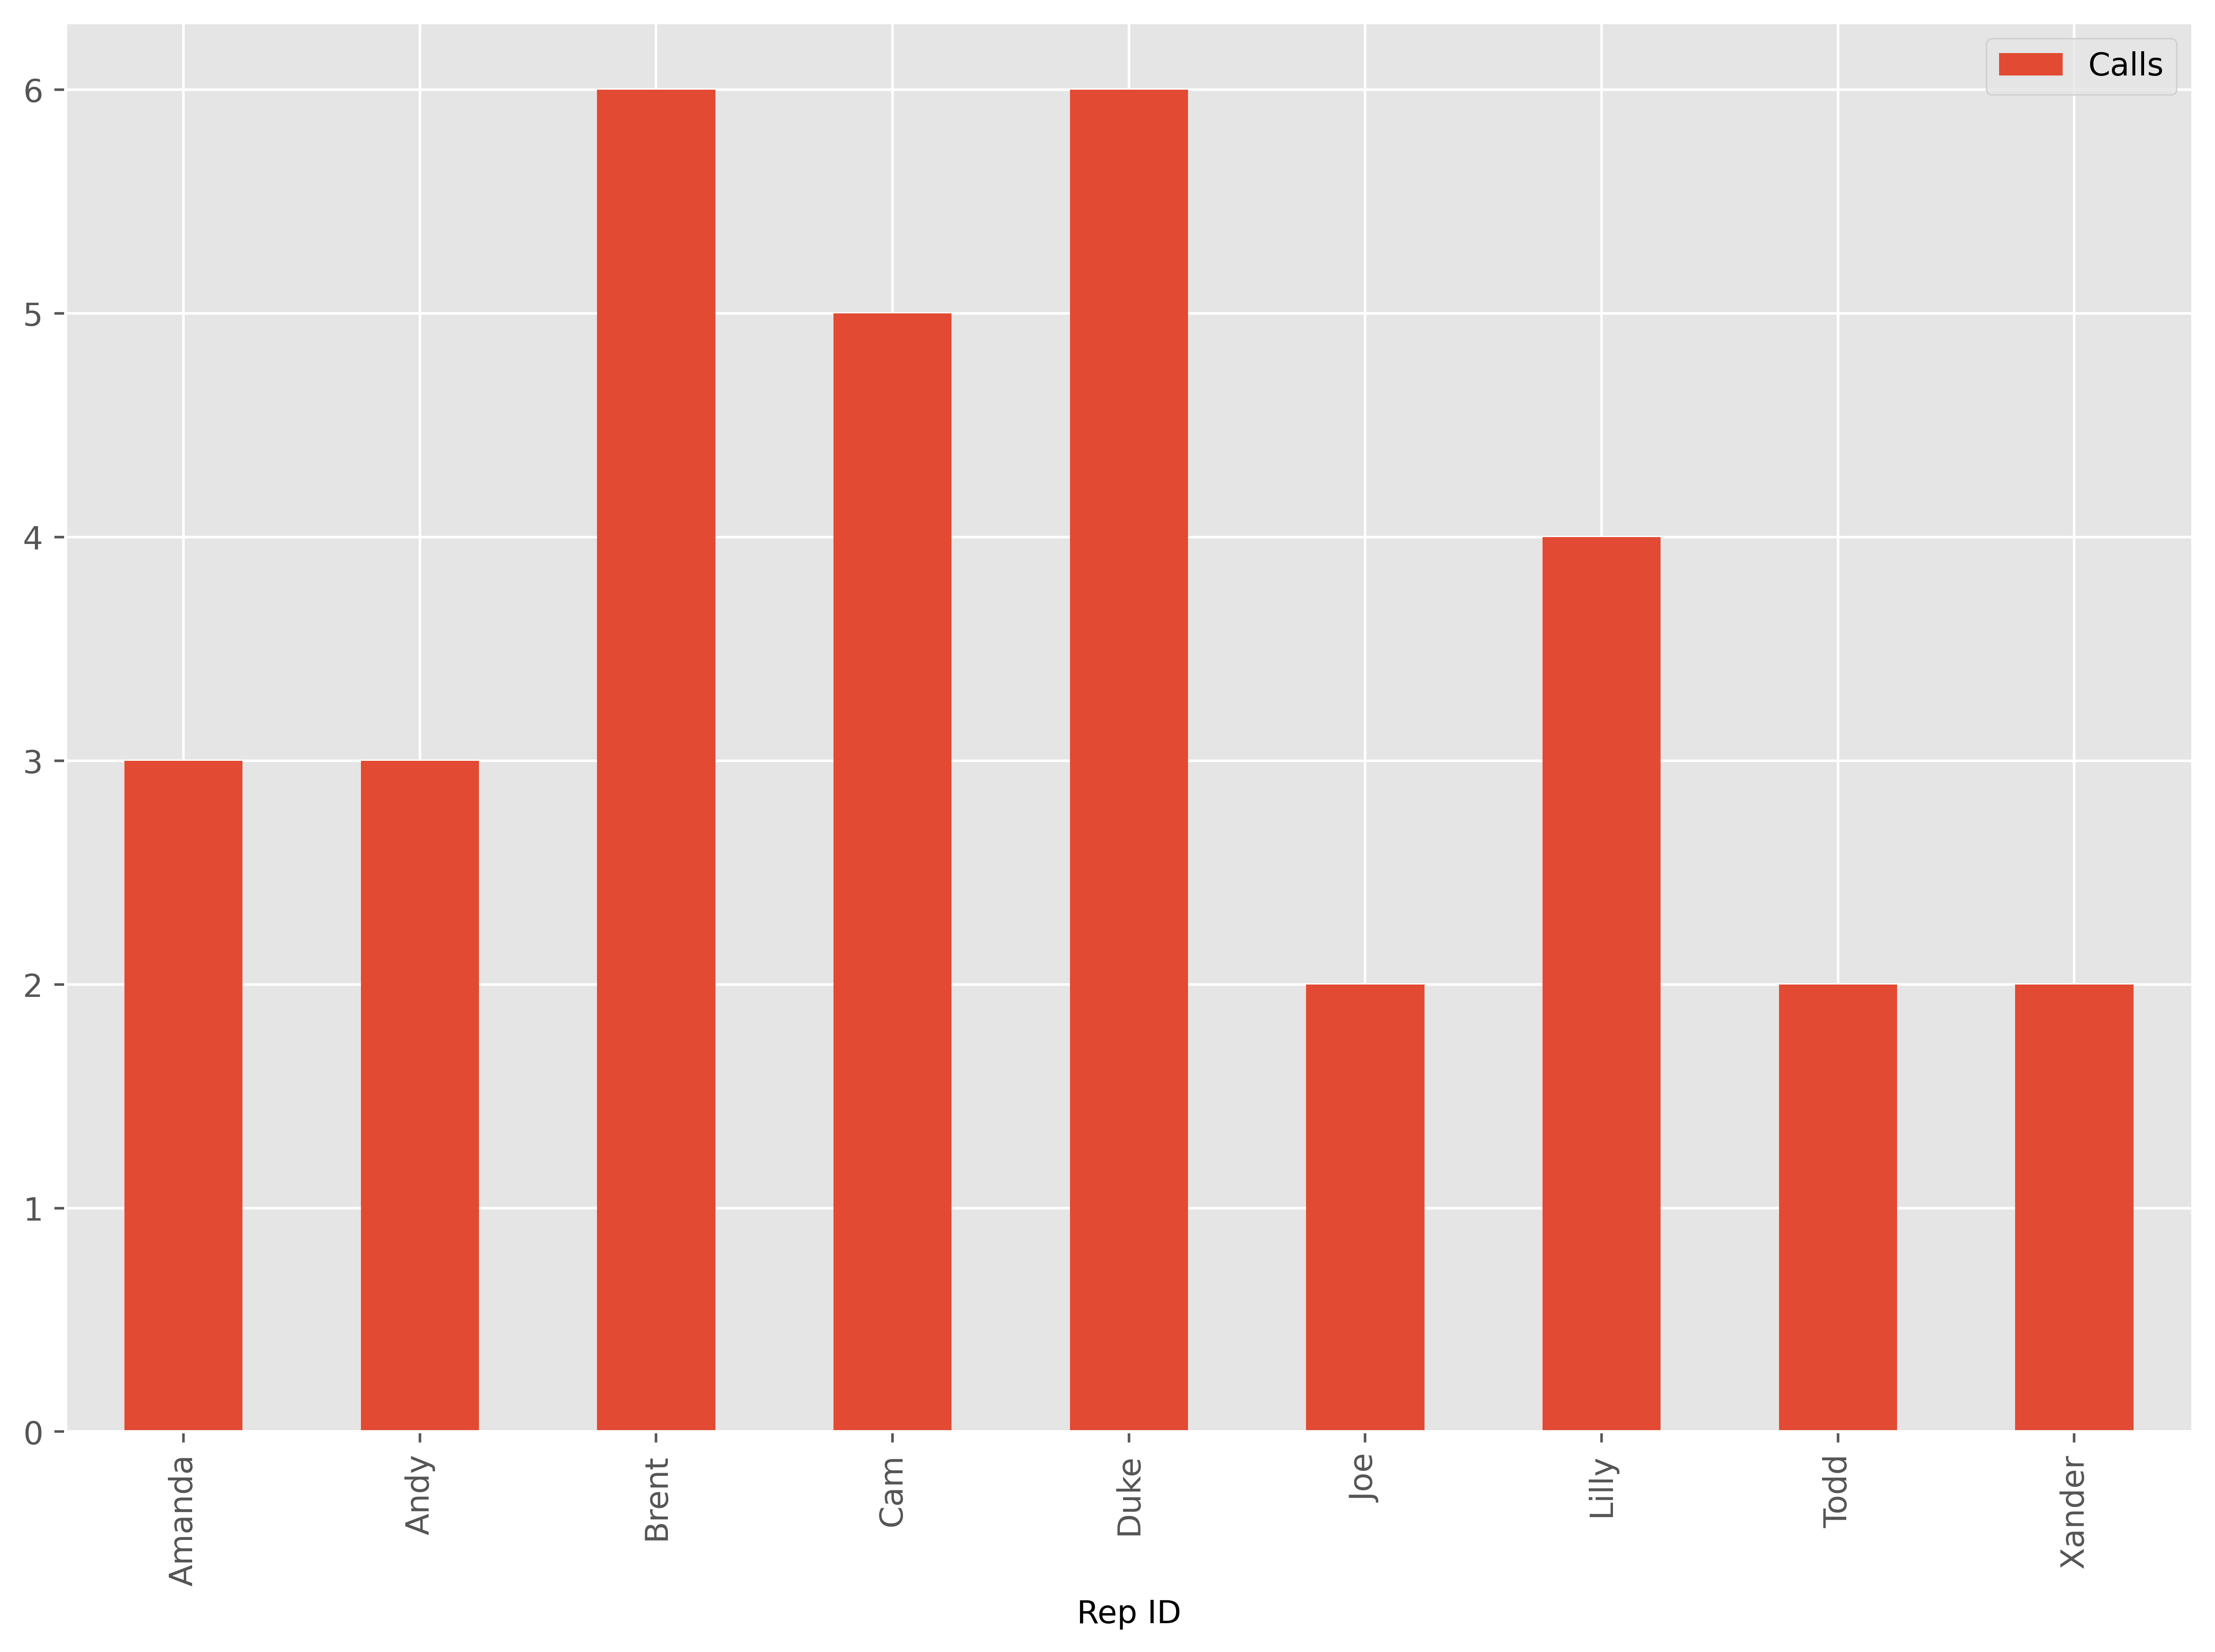

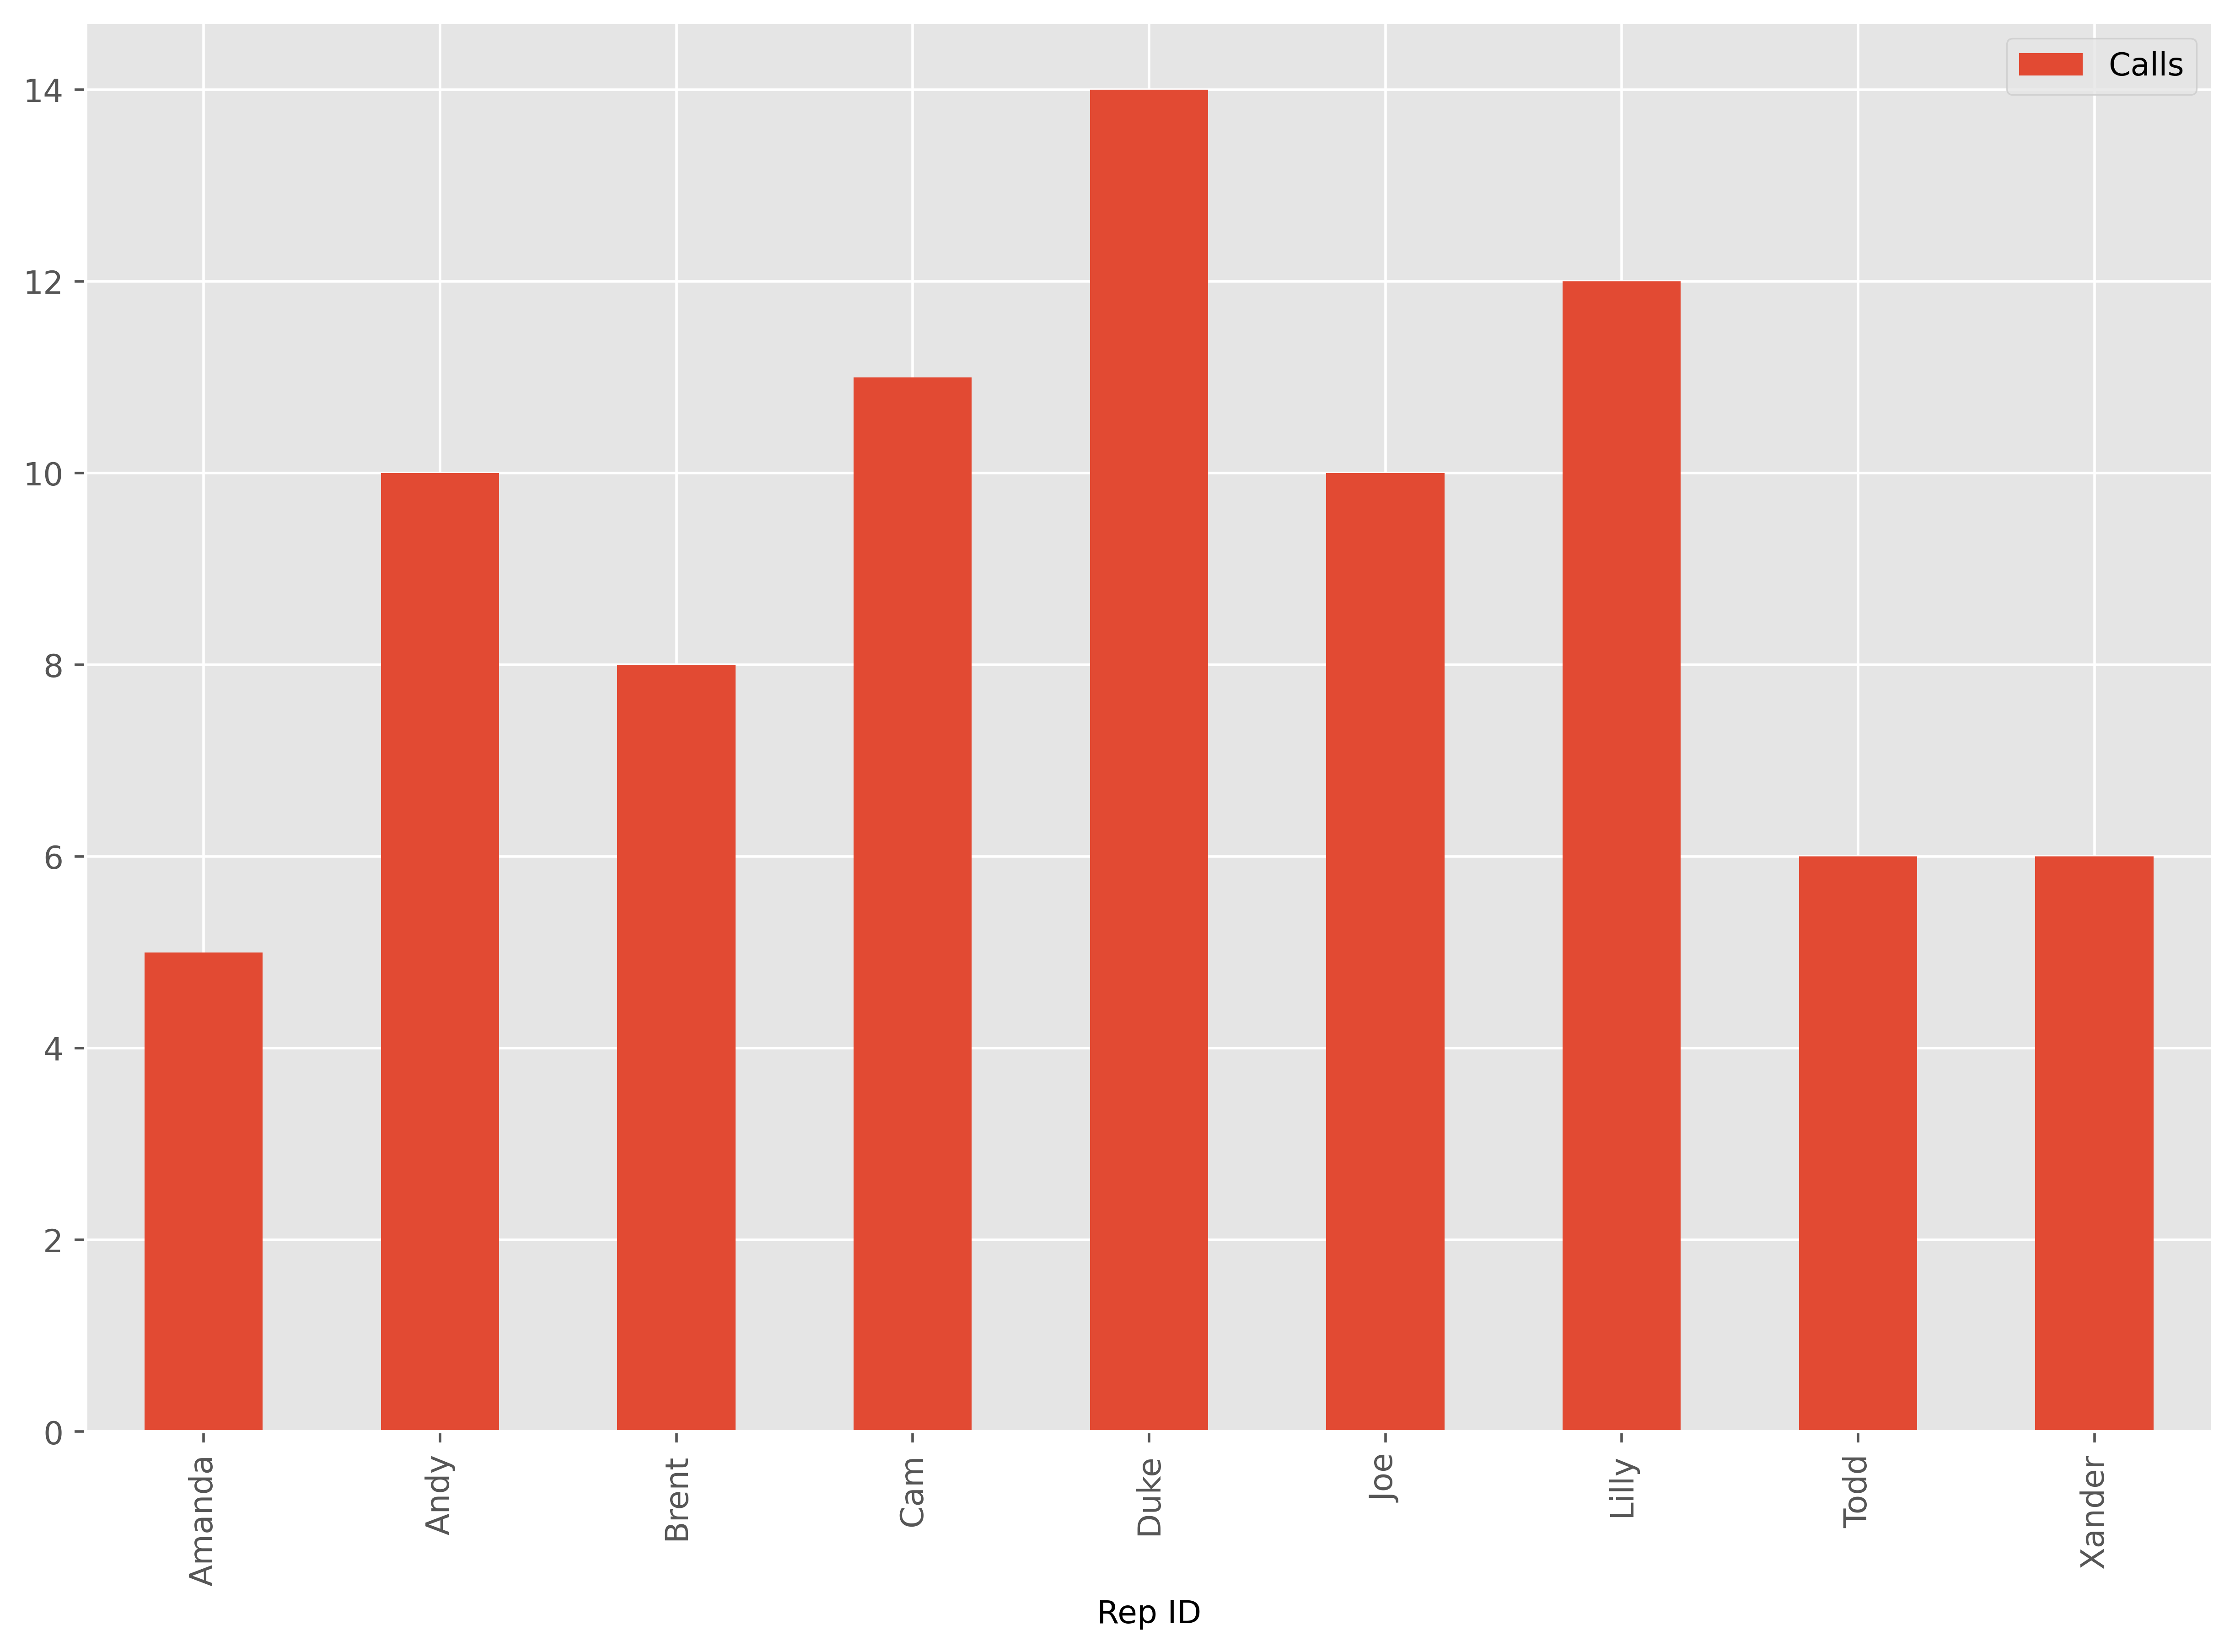

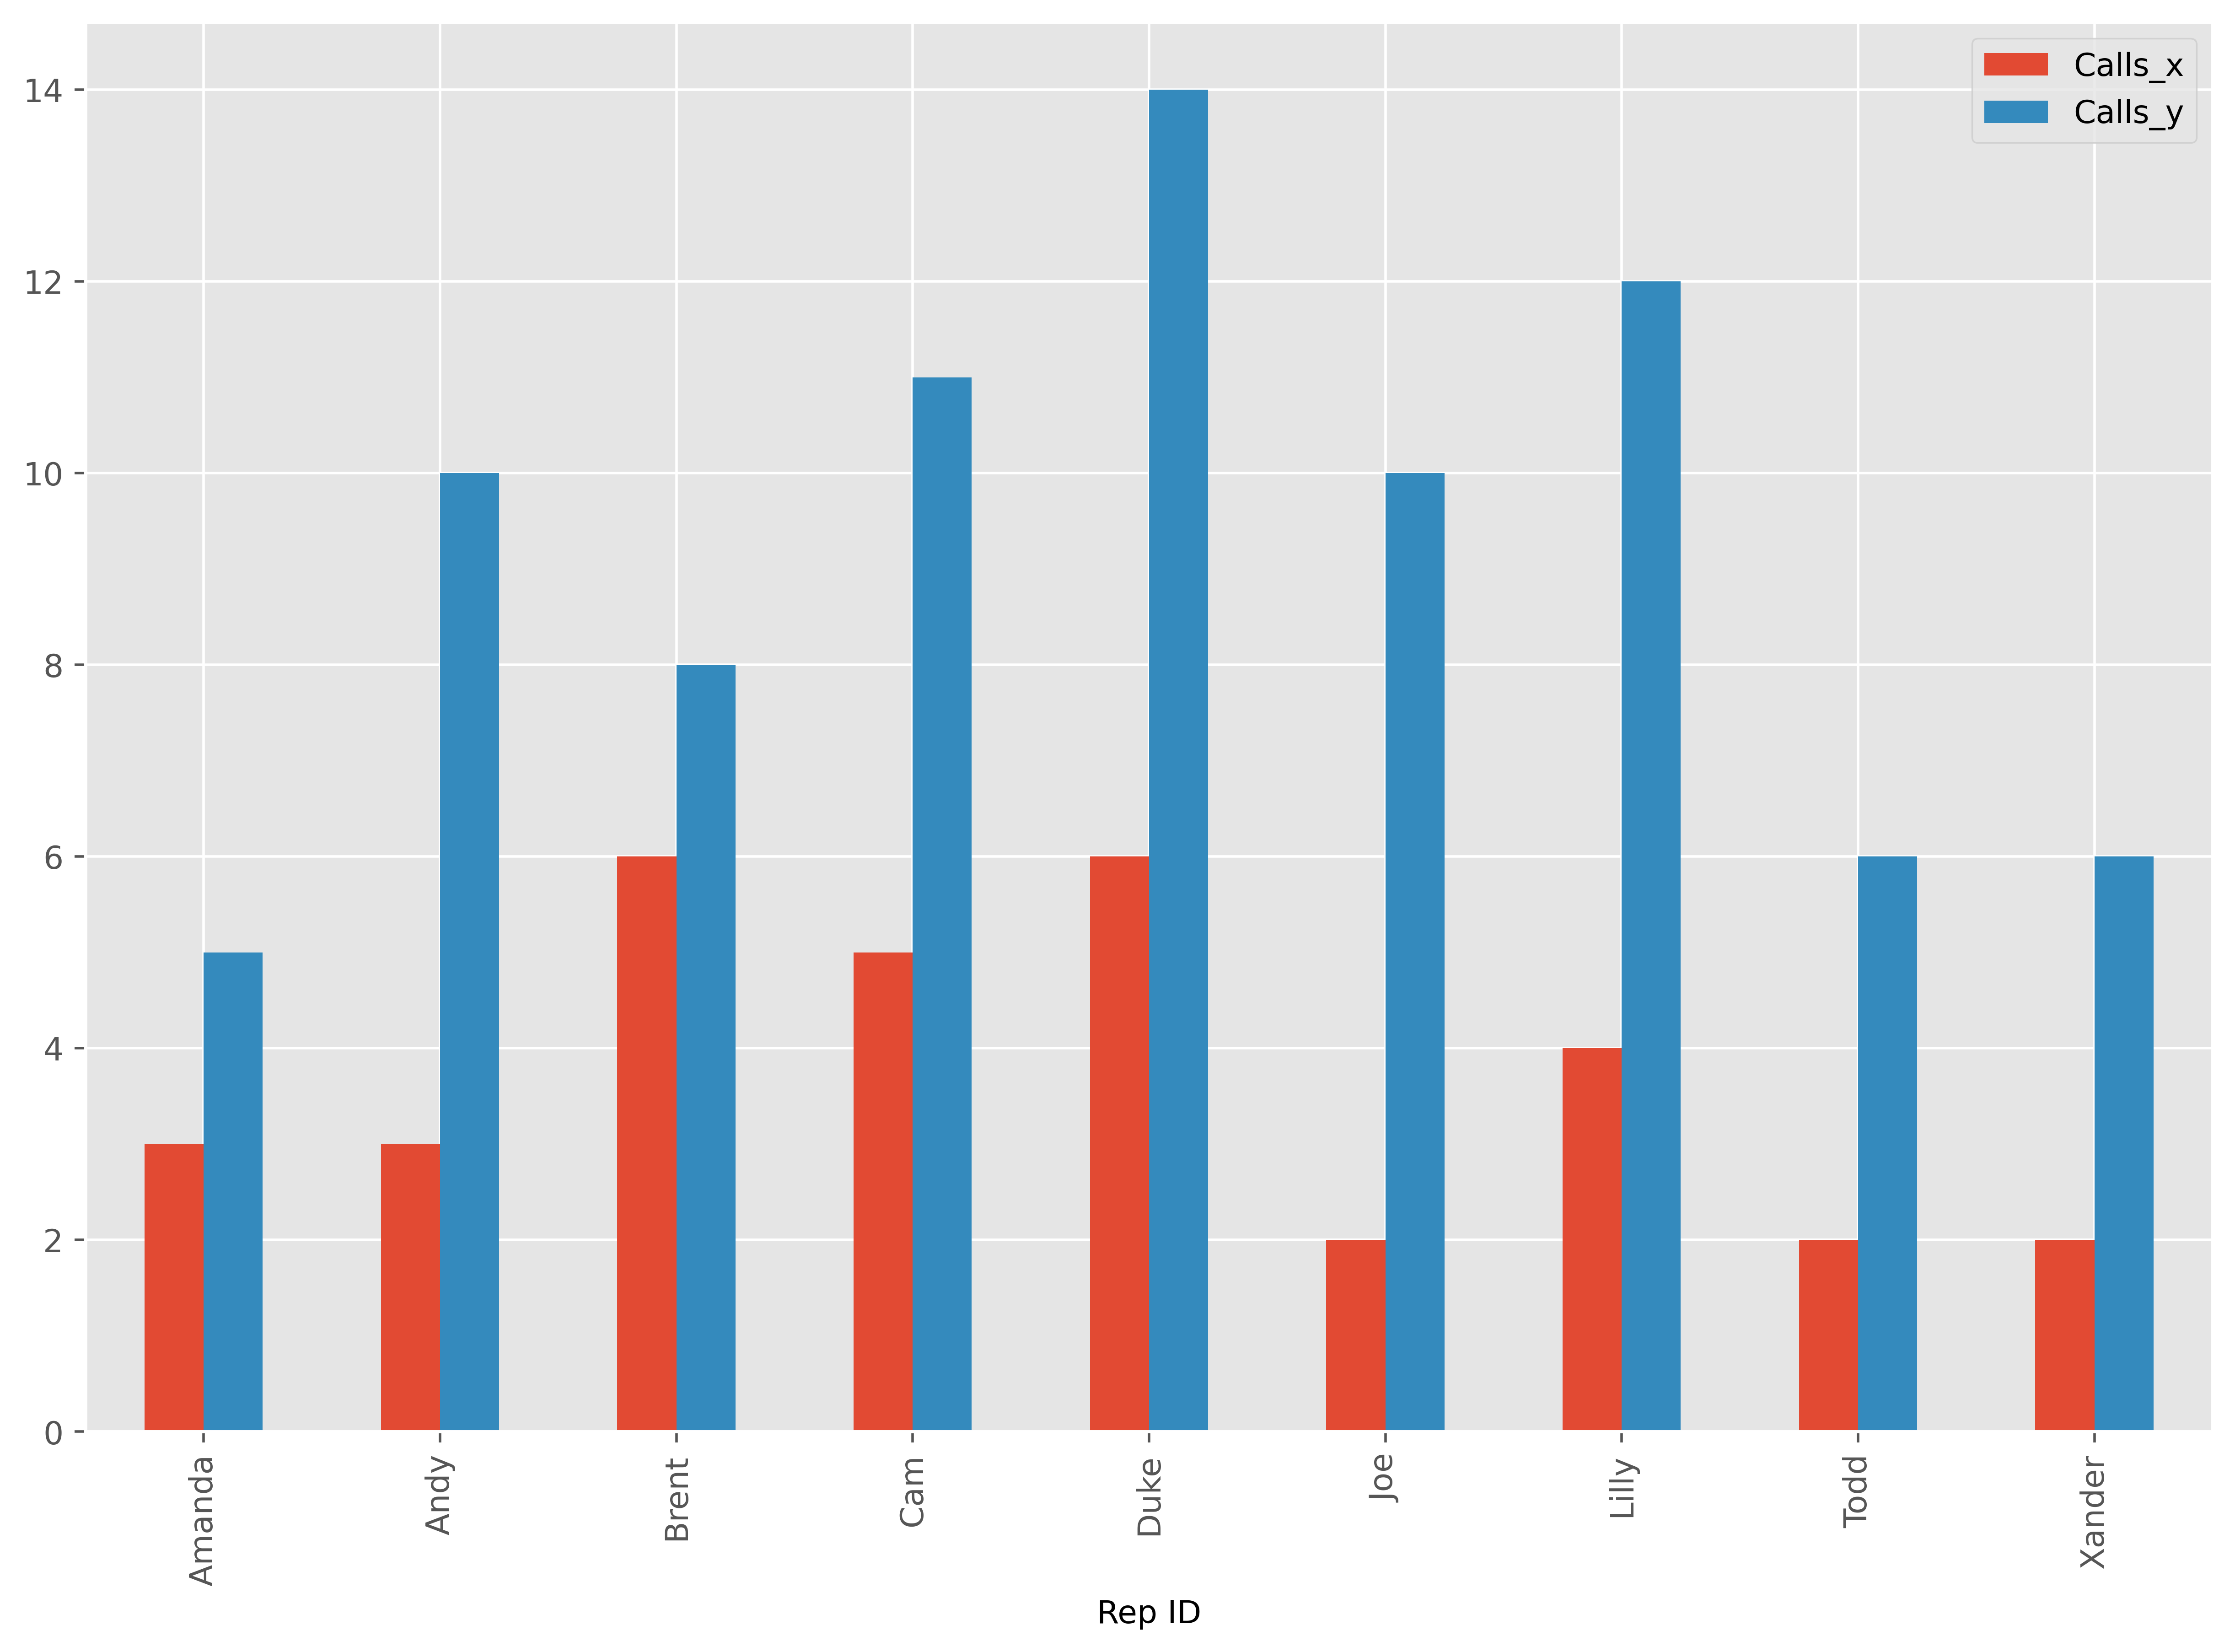

In [19]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep


## na values dropped for incoming wait times in north_branch##

north_plt = north_branch.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_branch[north_branch["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  

# Final Table
bargraph1 = quick_stats.plot.bar()

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_branch[north_branch["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() 



quick_calls = north_branch[north_branch["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  

# Final Table



# Final Table  

bargraph2 = total_stats.plot.bar()

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

bargraph3 = service_level.plot.bar()

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100


#Your Code Here:



#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I was going to use the pie chart, but I didn't like that I had it separated into subplots. I liek bar graphs when quantifying this type of data. Especially since we have multiple indexes, this graph was the only one that I was easily able to read everything I wanted to display on one graph

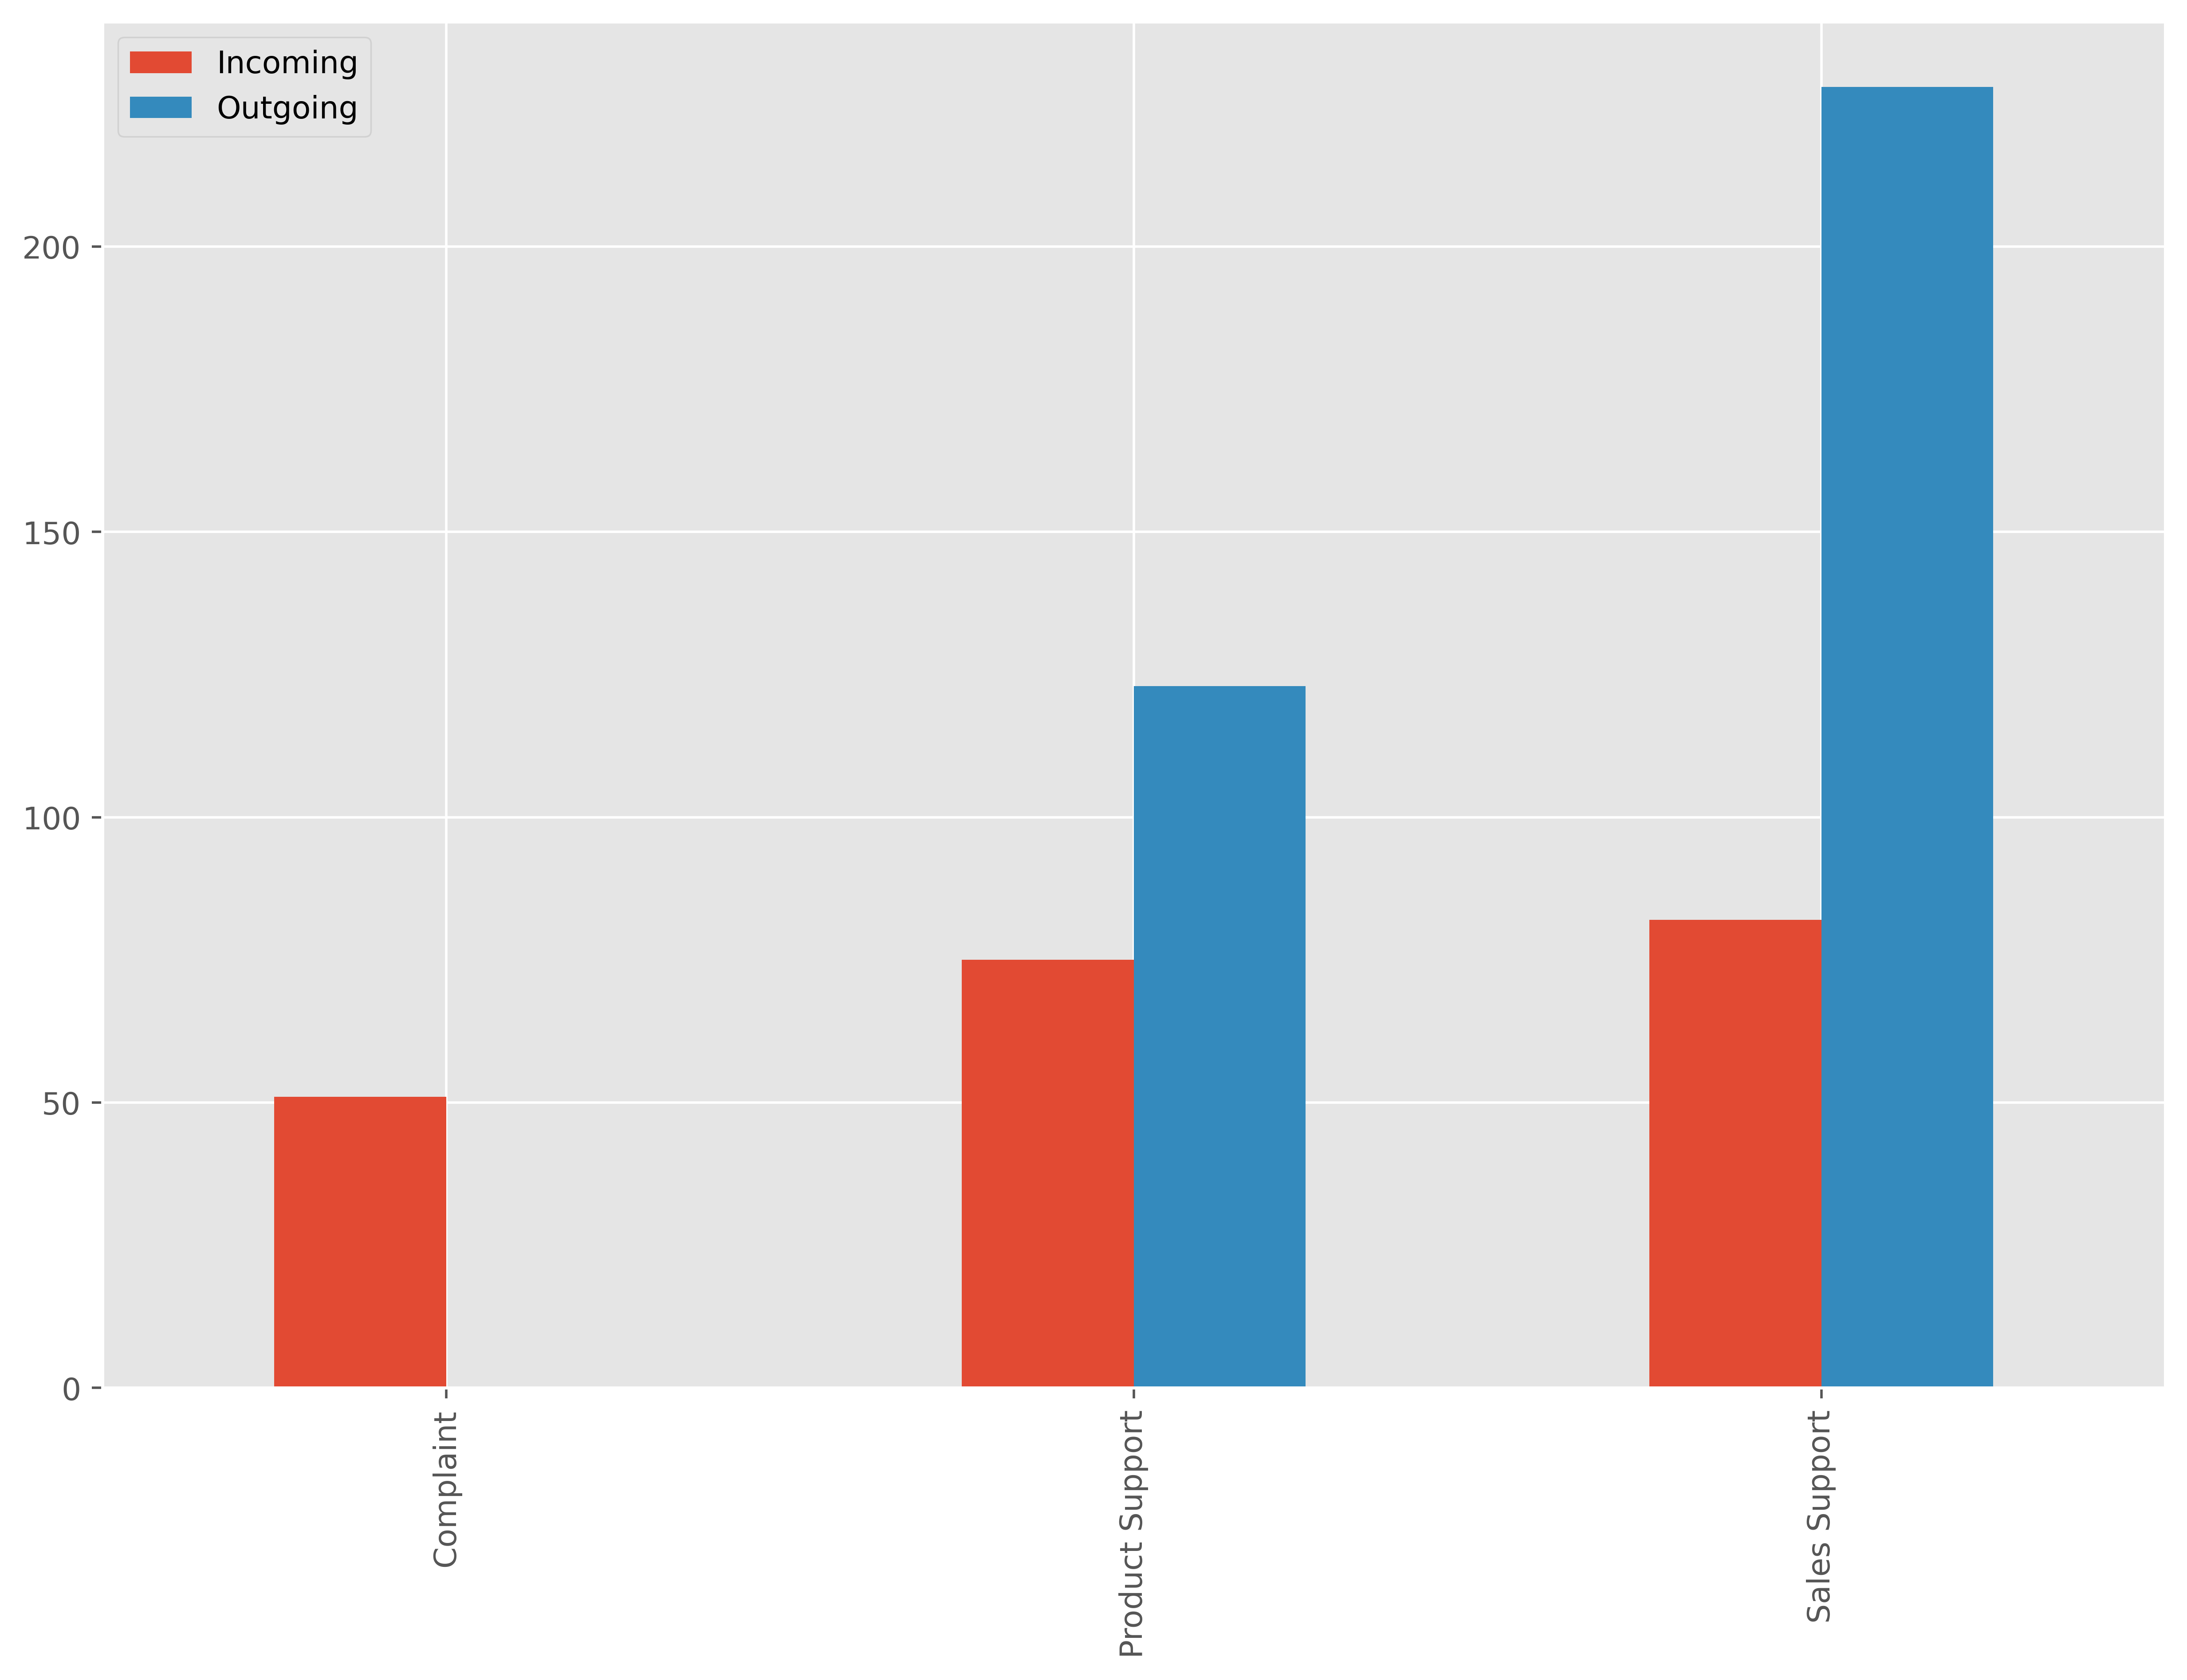

In [20]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()


# # dictdf = pd.DataFrame(complaints, index= purpose_counts)

# dictdf = pd.DataFrame.from_dict(complaints)
# df.plot(kind = 'bar')
# plt.show()


# import matplotlib.pyplot as plt


# plt.plot(range(len(complaints)), values, tick_label=keys)
# plt.show()
# print(complaints)
#Your Code Here:
# # dictdf.plot(kind='bar',x=purpose_counts, stacked=True, title = 'Direct vs Tele sales', colormap = 'viridis');
# dictdf.plot(x="Incoming", title = 'Direct vs Tele sales', colormap = 'viridis');

data = pd.DataFrame([complaints,sales_support,product_support], index=call_purpose)


# data.reset_index(inplace=True)
# data = data.rename(columns = {'index':'Call Purpose'})

# data.head()


data.plot(kind="bar", use_index=True);

In [21]:

dfdropped=(df[df["Incoming Wait Time"] != "N/A"])

branch_plt = dfdropped.groupby("Branch")["Incoming Wait Time"].mean().to_frame().reset_index()

branch_quick_calls = dfdropped[dfdropped["Incoming Wait Time"] <= 2.0]
branch_quick_reps = branch_quick_calls[["Branch", "Calls"]]
branch_quick_stats = branch_quick_reps.groupby(["Branch"]).sum()  

branch_total_calls_in=dfdropped[dfdropped["Incoming or Outgoing"]== "Incoming"]
branch_rep_calls = branch_total_calls_in[["Branch", "Calls"]]  
branch_total_stats = branch_rep_calls.groupby(["Branch"]).sum() 

branch_service_level = pd.merge(branch_quick_stats, branch_total_stats, on="Branch")

# Create Percentage Column in Table 3
branch_service_level["Service Level %"] = branch_service_level["Calls_x"]/branch_service_level["Calls_y"] * 100

print(branch_service_level)
print(branch_plt)

        Calls_x  Calls_y  Service Level %
Branch                                   
North        33       82        40.243902
South        48      126        38.095238
  Branch  Incoming Wait Time
0  North             3.04878
1  South             3.00000


In [22]:
df.groupby(['Branch']).sum()

C:\Users\cbate\AppData\Local\Temp\ipykernel_15160\4264265825.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Branch']).sum()


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,During Call Wait Time,Calls
Branch,,,,,,,
North,29890,5,7,2447,469,727,245
South,49141,11,4,3157,600,966,314


## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
        wait ideal  dropped  Service Level %
Branch                                   
North        33       82        40.243902
South        48      126        38.095238
  Branch  Incoming Wait Time
0  North             3.04878
1  South             3.00000


The north branch is operating more efficiently as it has a higher service level at 40.24% VS South's 38.09 %

The incoming wait times are near identical, and are only a fraction of a second off.

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer:  I think the south needs more help, they have more calls coming in, longer Busy minutes. and lower service levels.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: I wish I knew if the null values in incoming time were due to being 0 second pick ups or not, as that would be beneficial for the company to consider. 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

ValueError: x and y must have same first dimension, but have shapes (559,) and (2,)

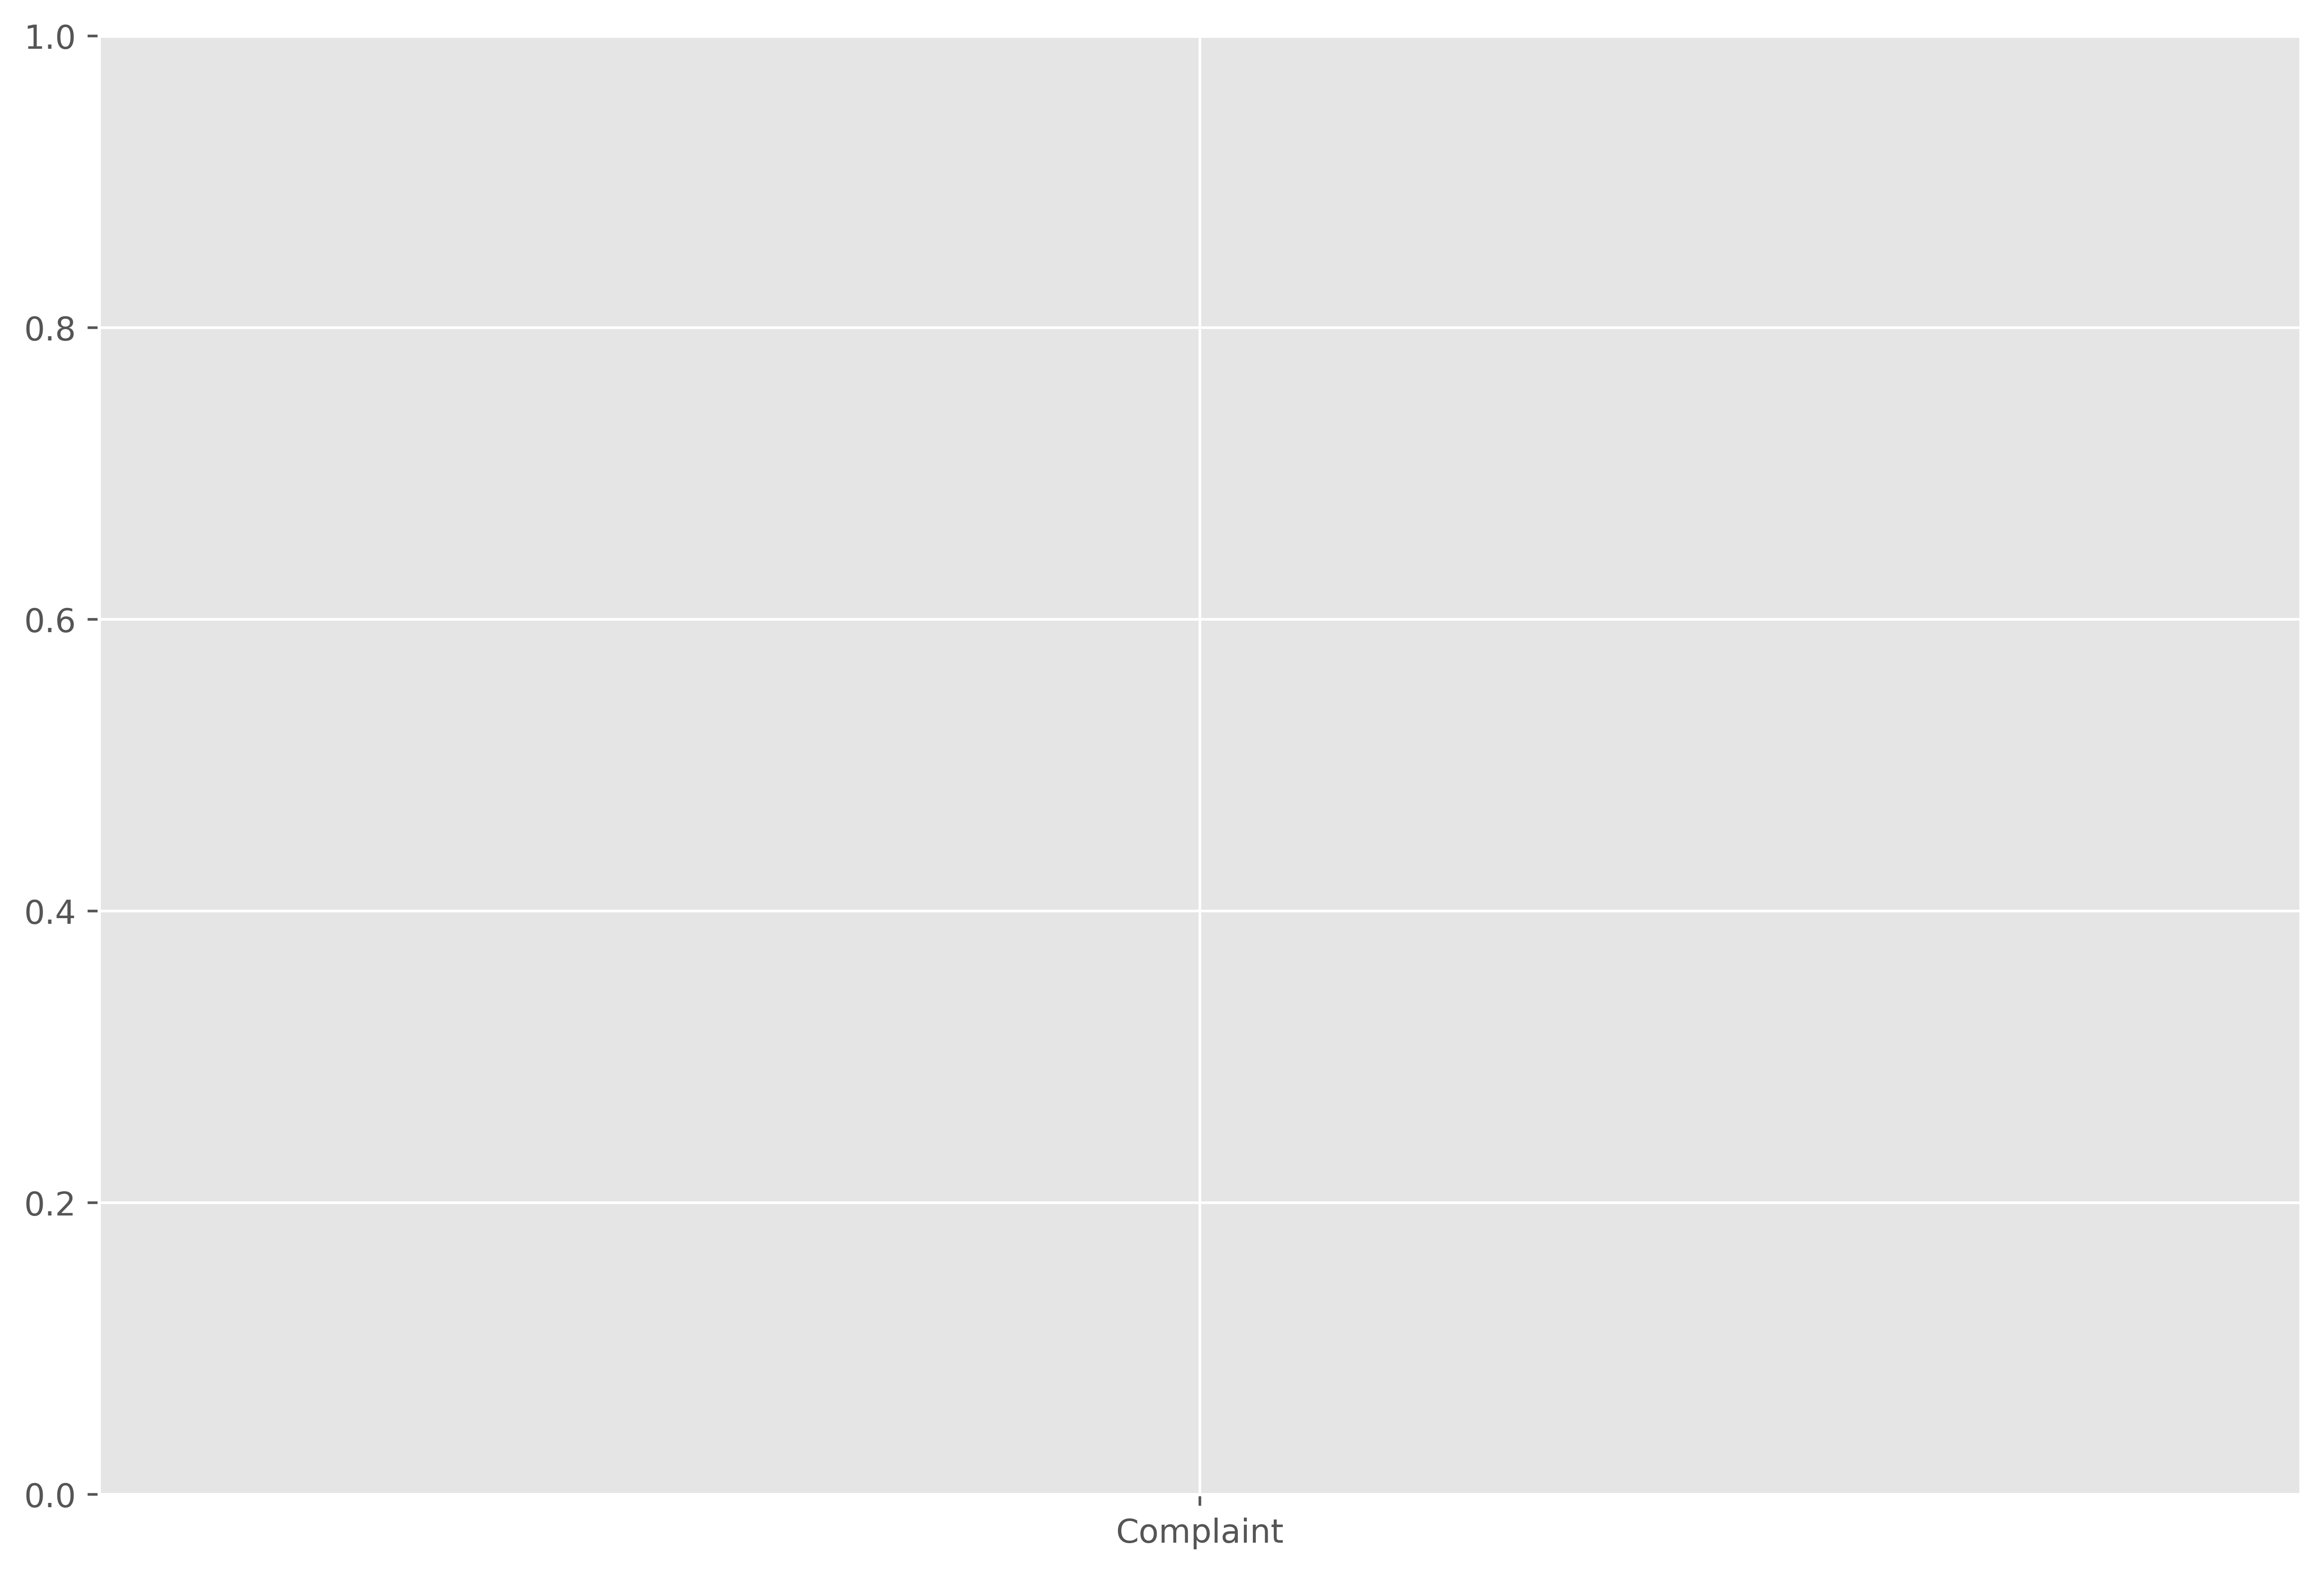

In [23]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
# Use groupby to plot based on time blocks:

time_group=call_times.groupby(["Time Block"])

time_group
# time_group.plot.scatter(x="Time Block", y="Incoming or Outgoing")
# Use groupby and get_group to select which call purpose to plot:

# get_group=time_group["Call Purpose", "Incoming or Outgoing"]


# data.reset_index(inplace=True)
# data = data.rename(columns = {'index':'Call Purpose'})

# call_times.plot.scatter(x=call_totals, y=[time_group, get_group], figsize=(9, 8))

import matplotlib.pyplot as plt
  
# line 1 points
x1 = df["Call Purpose"]
y1 = df["Incoming or Outgoing"].value_counts()
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")
  
# line 2 points
x2 = df["Call Purpose"]
y2 = df["Incoming or Outgoing"].value_counts()
# plotting the line 2 points 
plt.plot(x2, y2, label = "line 2")
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
# giving a title to my graph
plt.title('Two lines on same graph!')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

##### 